Explore data from all the experiments of <code>July2022</code>:
- Compute the number and mean volume of the agglomerates with respect to $t$ and with respect to $z$;
- Plot the results.

In [1]:
import numpy as np
import napari               # type: ignore
import myfunctions as mf
import matplotlib.pyplot as plt

In [2]:
segmented_sequence = mf.load_segmentation_map('P28A_FT_H_Exp1', OS='Windows')

data = mf.explore_experiment(segmented_sequence)

Loading segmentation map...
Segmentation map loaded successfully in 8.45 s


Evaluating the t axis:   0%|          | 0/55 [00:00<?, ?it/s]c:\Users\venturel\AppData\Local\anaconda3\envs\test\lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\venturel\AppData\Local\anaconda3\envs\test\lib\site-packages\numpy\core\_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
y:\code\matteo\MasterThesis\myfunctions.py:334: RuntimeWarning: invalid value encountered in cast
  fixed_t_volume[t] = np.mean(label_counts)
Evaluating the z axis: 100%|██████████| 21/21 [00:06<00:00,  3.27it/s]


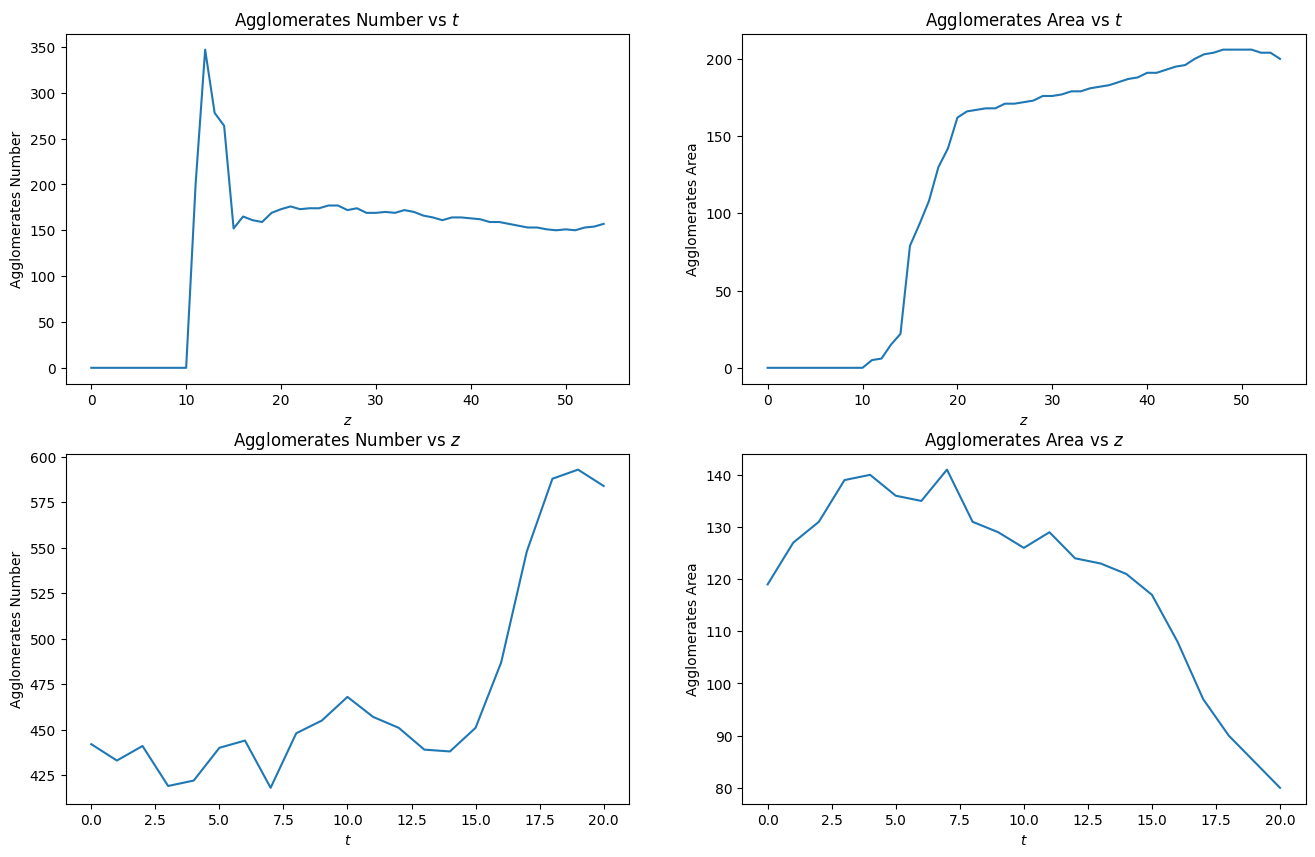

In [5]:
fig, axes = plt.subplots(2, 2, figsize=(16, 10))
titles = ['Agglomerates Number vs $t$', 'Agglomerates Area vs $t$', 'Agglomerates Number vs $z$', 'Agglomerates Area vs $z$']

for y, i, j in zip([data.fixed_t_volume, data.fixed_t_number, data.fixed_z_volume, data.fixed_z_number], [0, 0, 1, 1], [0, 1, 0, 1]):
    axes[i, j].plot(y)
    axes[i, j].set_title(titles[2*i + j])
    axes[i, j].set_xlabel('$z$' if i == 0 else '$t$')
    axes[i, j].set_ylabel('Agglomerates Number' if j == 0 else 'Agglomerates Area')

Explore data from all the experiments of <code>July2022</code> and carry out the following analyses:
- <code>explore_volume</code> fixes the time instant <code>t</code> and scans all slices from <code>first_slice</code> to <code>last_slice</code>. This is carried out for multiple time instants, which are given by $$t_i,\; t_i+step,\; ... ,\; t_i+(n-1)*step$$ where $t_i=$<code>start_time</code> and $n=$ <code>time_steps_number</code>. The exploration results are the average number and surface of agglomerates in each slice (<code>volume_number</code> and <code>volume_area</code>, respectively). The mean, the standard deviation and the values associated to each volume are stored for both of the features.

- <code>explore_slice</code> fixes the $z$ coordinate <code>z</code> and scans all time instants from <code>start_time</code> to <code>end_time</code>. This is carried out for multiple $z$ coordinates, which are given by $$s_i,\; s_i+\frac{s_f-s_i}{n-1},\; ... ,\; s_f$$ where $s_i=$ <code>first_slice</code>, $s_f=$ <code>last_slice</code> and $n=$ <code>volumes_number</code>. The exploration results are the average number and surface of agglomerates in each slice (<code>slice_number</code> and <code>slice_area</code>, respectively). The mean, the standard deviation and the values associated to each slice are stored for both of the features.